#Using Balance Theory to detect driver genes in cancer

We have an idea to detect driver genes in cancer using balance theory. We know that every complex system is in minimum free energy state and tends to stay there. Pertubrations cause the system to unbalance and the free energy to increases. As the system tries to cool down to minimal energy, some changes happen. We are going to use this concept to detect driver genes that cause cancer, as they probably change free energy of the system.

To this end, we use Prostate cancer data derived from NCBI Gene Omnibus GDS2545 dataset. We first load data of prostate tissue in four states: Normal, Adjacent, Tumor, Metastasis.

In [2]:
import numpy as np

# Use dtype=None to have string values as are, otherwise numpy tries to convert them into fload.
normal_data = np.genfromtxt('normal.csv',delimiter=',',names=True,dtype=None)
adjacent_data = np.genfromtxt('adjacent.csv',delimiter=',',names=True,dtype=None)
tumor_data = np.genfromtxt('tumor.csv',delimiter=',',names=True,dtype=None)
metastasis_data = np.genfromtxt('metastasis.csv',delimiter=',',names=True,dtype=None)

In [2]:
# Extract expression data

normal_exp_cols = list(normal_data.dtype.names[2:])
normal_exp = normal_data[normal_exp_cols].view(np.float64).reshape(normal_data.shape[0],len(normal_exp_cols))

adjacent_exp_cols = list(adjacent_data.dtype.names[2:])
adjacent_exp = adjacent_data[adjacent_exp_cols].view(np.float64).reshape(adjacent_data.shape[0],len(adjacent_exp_cols))

tumor_exp_cols = list(tumor_data.dtype.names[2:])
tumor_exp = tumor_data[tumor_exp_cols].view(np.float64).reshape(tumor_data.shape[0],len(tumor_exp_cols))

metastasis_exp_cols = list(metastasis_data.dtype.names[2:])
metastasis_exp = metastasis_data[metastasis_exp_cols].view(np.float64).reshape(metastasis_data.shape[0],len(metastasis_exp_cols))

We use a modified version of ARACNE algorithm to construct a network for each dataset.

In [3]:
normal_rs = np.fromfile('normal-rs')
normal_rs_p = np.fromfile('normal-rs-p')

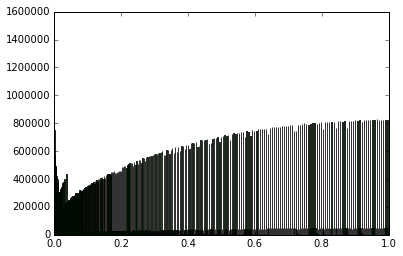

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(normal_rs_p.reshape(12625*12625,1),1000,color='green',alpha=0.8)
plt.show()

In [18]:
normal_rs = normal_rs.reshape((12625,12625))
normal_rs_p = normal_rs_p.reshape((12625,12625))
normal_rs_sig = np.where(normal_rs_p < 0.2,normal_rs,np.zeros((12625,12625)))

In [142]:
normal_rs_adj = np.where(np.absolute(normal_rs_sig) > 0.7,normal_rs_sig,np.zeros((12625,12625)))
np.fill_diagonal(normal_rs_adj,0)
print np.transpose(np.nonzero(normal_rs_adj)).shape/2

(1614554, 2)


In [135]:
import networkx as nx


In [136]:
graph = nx.from_numpy_matrix(normal_rs_adj)

In [178]:
 Gc = max(nx.connected_component_subgraphs(graph), key=len)

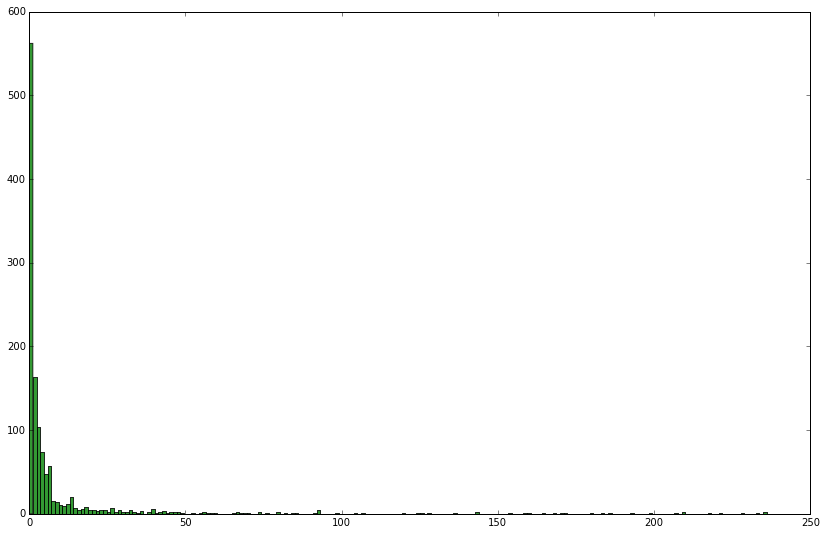

In [160]:
fig = plt.figure()
fig.set_size_inches(14, 9)

plt.hist(nx.degree_histogram(graph),200,color='green',alpha=0.8)
plt.show()

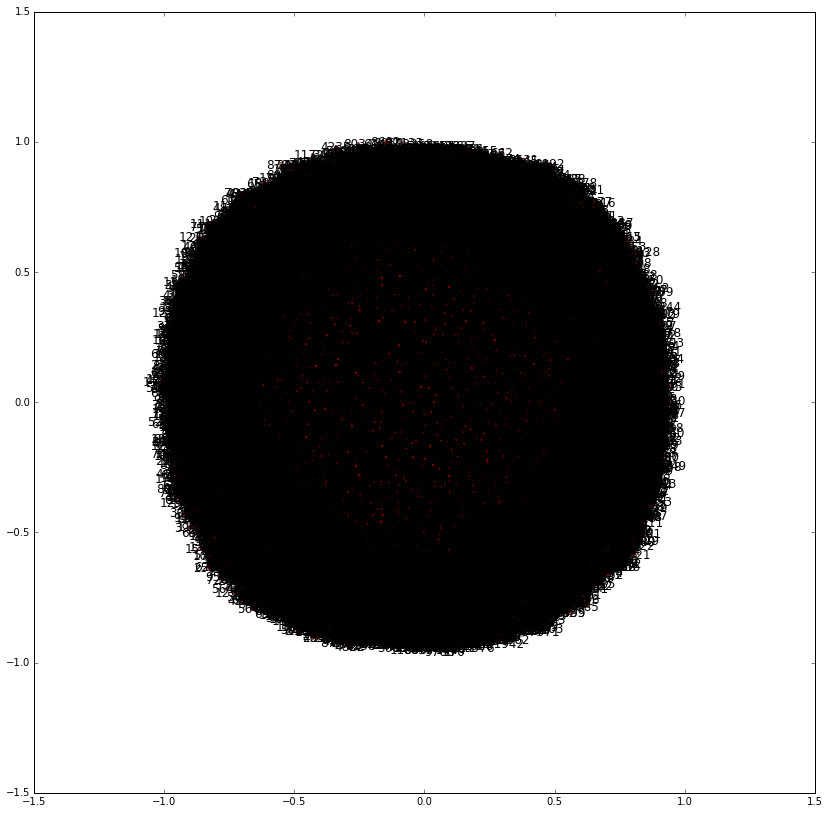

In [186]:
fig = plt.figure()
fig.set_size_inches(14, 14)

nx.draw_networkx(Gc,node_size=10,alpha=0.5,)